# Artificial Bee Colony Algorithm
## Paper link : [Optimization algorithm by Dervis KARABOGA, Erciyes University](https://www.semanticscholar.org/paper/AN-IDEA-BASED-ON-HONEY-BEE-SWARM-FOR-NUMERICAL-Karabo%C4%9Fa/cf20e34a1402a115523910d2a4243929f6704db1)
An idea based on honey bee swarm for numerical Optimization

Welcome to the showcase notebook for our implementation of the Artificial Bee Colony Algorithm. It was originally based on the idea of Dervis KARABOGA, from the Erciyes University, in Turkey. Original paper can be found [here](https://www.semanticscholar.org/paper/AN-IDEA-BASED-ON-HONEY-BEE-SWARM-FOR-NUMERICAL-Karabo%C4%9Fa/cf20e34a1402a115523910d2a4243929f6704db1)

The bee_search function implements the artificial bee colony algorithm.  
It is an optimization algorithm, inspired by the behaviour of honey bees looking for new food sources. In the original paper by Derviş Karaboğa, there is no implementation directives. We figured we could implement the algorithm as we would like to. The main differences we can act on are:  

- the repartition of bees in the have : how many worker/onlooker/scout there must be.
- the way bees choose and generate new food sources.  

We gave our bees the ability to look around their food along one variable. We could also use a multivariate gaussian centered on their position to generate a new food source. A uniform distribution along each variable is also an idea.  
For our bees, they randomly choose one variable and add a number between -0.5 and 0.5 multiplied by a step parameter to that variable. Our implementation is inspired by the one presented in [this video](https://www.youtube.com/watch?v=U9ah51wjvgo)

In [1]:
from bees import bee_search
import numpy as np
from math import exp
from matplotlib import pyplot as plt

For this demonstration we will use three functions. The square and square_2d convex functions and the peak function.

In [2]:
def square(input_vect):
    x1 = input_vect[0]
    return x1*x1

In [3]:
def square_2d(input_vect):
    x1 = input_vect[0]
    x2 = input_vect[1]
    return x1*x1 + x2*x2

## Plotting the peaks function  
We first encountered the peak function in MATLAB demos of the ABC algorithm. We then saw that same funciton in the matplotlib documentation and searched for the formula for in the [source code](https://github.com/matplotlib/matplotlib/blob/v3.8.2/lib/mpl_toolkits/mplot3d/axes3d.py#L3435-L3448) of matlotlib


In [4]:
def peaks(input_vect):
    x1 = input_vect[0]
    x2 = input_vect[1]

    z1 = np.exp(-(x1**2 + x2**2) / 2) / (2 * np.pi)
    z2 = (np.exp(-(((x1 - 1) / 1.5)**2 + ((x2 - 1) / 0.5)**2) / 2) /
          (2 * np.pi * 0.5 * 1.5))
    z = z2 - z1
    
    return z * 5000

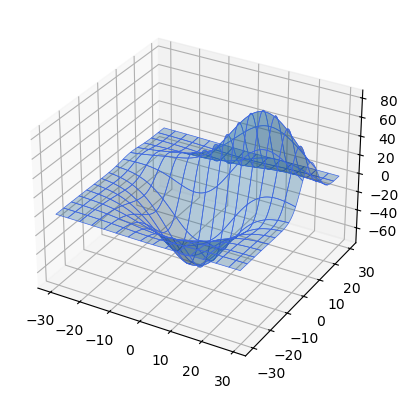

In [5]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

plt.show()

As you can see the peaks function is particularily interesting as it has a maximum and a minimum. It's also flat everywhere around.

Let's start by looking at the behaviour of the algorithm for the square functions

### Square functions

In [6]:
start, end = -10, 10
square_search_space = np.array([[start], [end]])
n_iter = 2000
y=[None] * n_iter

In [7]:
for i, solution in bee_search(square, square_search_space, minimize=True, max_iter=n_iter):
    y[i] = solution.quality    

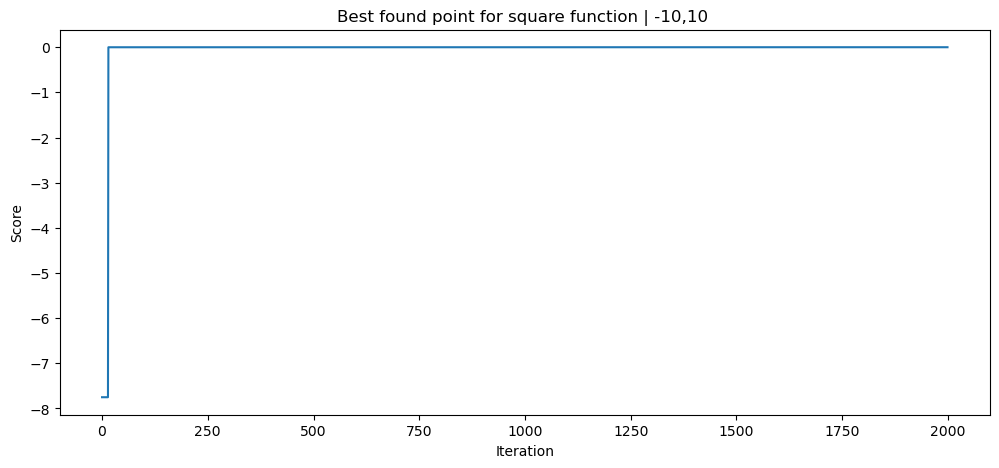

In [8]:
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(5)
plt.plot(range(0,n_iter), y)
plt.title(f"Best found point for square function | {start},{end} ")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()

In [9]:
start, end = -10, 10
square_search_space = np.array([[start], [end]])
n_iter = 10000
y=[None] * n_iter

In [10]:
square_2d_search_space = np.array([[start, start], [end, end]])
for i, solution in bee_search(square_2d, square_2d_search_space, minimize=True, max_iter=10000, step=0.25):
    y[i] = solution.quality

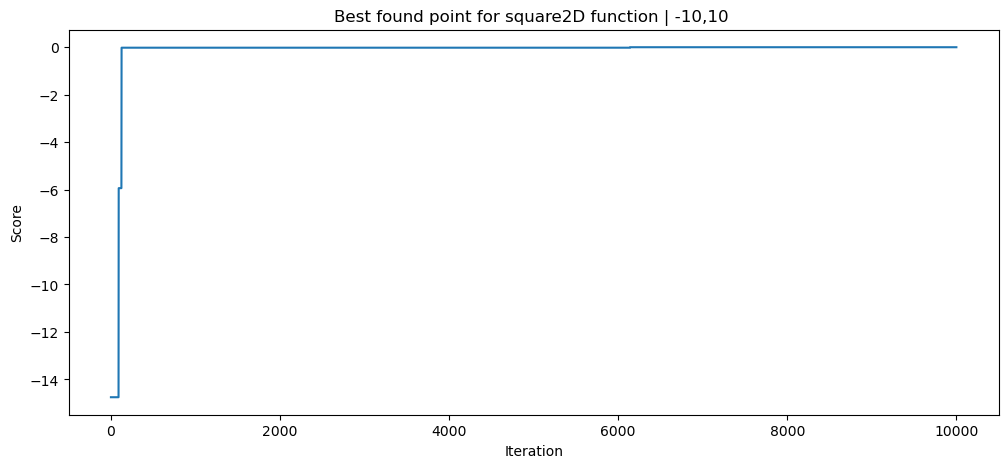

In [11]:
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(5)
plt.plot(range(0,n_iter), y)
plt.title(f"Best found point for square2D function | {start},{end} ")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()

For the square functions, the algorithm comes with a negative quality near 0. This is because the nature of the algorithm is to maximize food quality. So the minimize parameter allows to take the opposite of the function to minimize it instead of maximizing it. As we can see, it converges towards the 0,0 coordinates. However, in 2 dimensions, it struggles to converge fast. This is because of two things:
- The fact that there are two dimensions decrease the chances to find a better minimum. This is because in our implementation, the new food sources generated by onlookers and workers are the same as their current food but with a slight change along one axis. So they first have 1 chance over 2 to choose the correct axis, and they have to get lucky with the new food choosing as the new location is increased or decreased randomly.
- The fact that scouts search randomly around the search space. They have to find two coordinates that brings the bees closer to the minimum. Among all the solutions that are present in the search space. So a wider search space decreases the probability the scouts will find a better food source

Let's now look at the peaks function.

### Peaks function

In [12]:
start = -100
end = 100
square_search_space = np.array([[start], [end]])
n_iter = 10000
y=[None] * n_iter
peaks_search_space = np.array([[start, start], [end, end]])
for i, solution in bee_search(peaks, peaks_search_space, minimize=True, max_iter=n_iter, step=1):
    y[i] = solution.quality

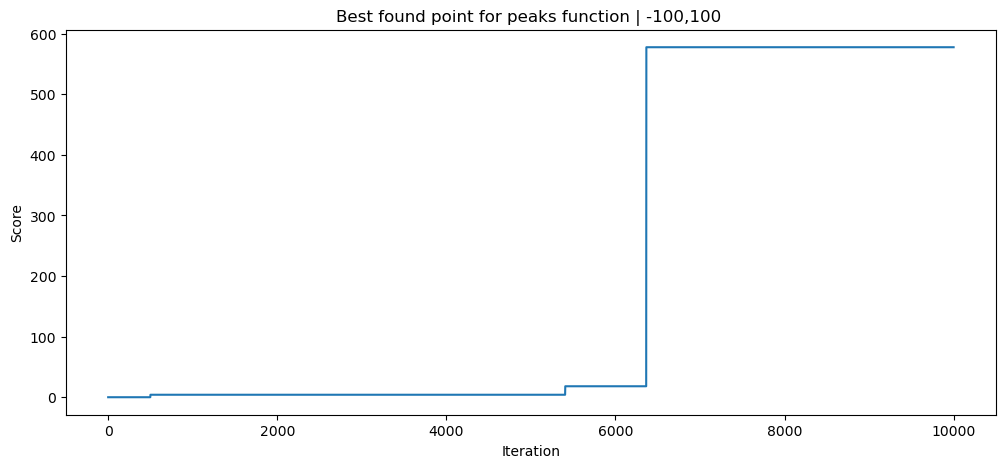

In [13]:
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(5)
plt.plot(range(0,n_iter), y)
plt.title(f"Best found point for peaks function | {start},{end} ")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()

In [14]:
start = -10
end = 10
peaks_search_space = np.array([[start, start], [end, end]])
for i, solution in bee_search(peaks, peaks_search_space, minimize=True, max_iter=n_iter, step=1):
    y[i] = solution.quality

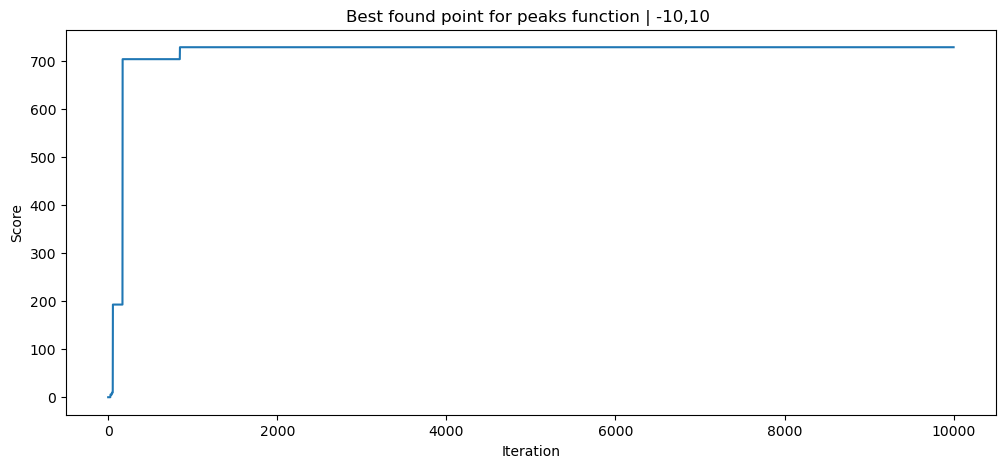

In [15]:
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(5)
plt.plot(range(0,n_iter), y)
plt.title(f"Best found point for peaks function | {start},{end} ")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()

We can see that using a wider search space decreases the ability of the bees to find a better quality food source. This is due to the same effects explained for the 2D squares. In addition to that, because the function is flat in the majority of places the bee search, they tend to only find worse food sources, so the best food source is less likely to be changed by bees. 

Let's try increasing the number of bees.

In [16]:
start = -100
end = 100
n_iter = 10000
y = [None] * n_iter
peaks_search_space = np.array([[start, start], [end, end]])
for i, solution in bee_search(peaks, peaks_search_space,n_bees=50,minimize=True, max_iter=n_iter, step=1):
    y[i]=solution.quality

Obviously a higher number of bees will imply a higher time of execution. However, the bees are more likely to find the optimum.

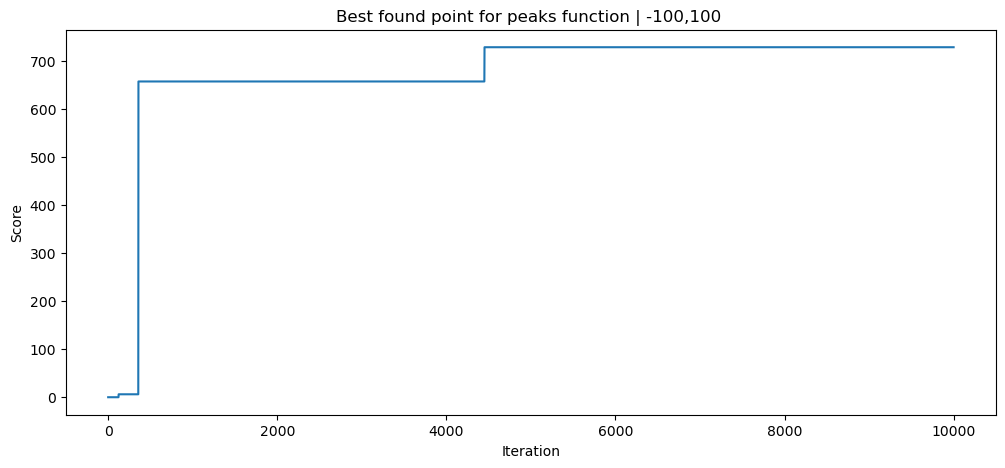

In [17]:
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(5)
plt.plot(range(0,n_iter), y)
plt.title(f"Best found point for peaks function | {start},{end} ")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()

Now I'll double the number of bees and iterations (NOTE: this might take a few seconds to run)

In [18]:
start = -100
end = 100
n_iter = 20000
y = [None]*n_iter
peaks_search_space = np.array([[start, start], [end, end]])
for i, solution in bee_search(peaks, peaks_search_space, n_bees=100, minimize=True, max_iter=n_iter, step=1):
    y[i] = solution.quality

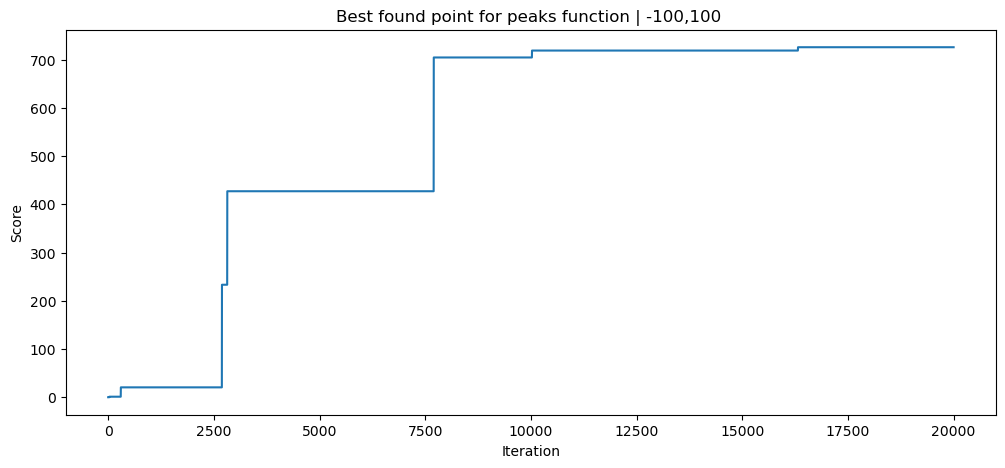

In [19]:
f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(5)
plt.plot(range(0,n_iter), y)
plt.title(f"Best found point for peaks function | {start},{end} ")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()

We should pay attention to increasing the number of bees and iterations, as it doesn't necessarily improve the best point.

## Conclusion  
In conclusion, we can see the limits of our implementation.  
- If we have a function that is flat in the majority of places like the peaks function, we should seek to define a search space that is tighter, or increase the number of iterations/number of bees
- One improvement we could do is have a variable step. An other way of solving this is to simply increase the amount of time the bee stays at the same food source. In our implementation, the default parameter is set to be 5. Or even make it so that the better the food source, the more time the bee gets back to that food source (i.e. make the food source contains more food quantity, so the food source gets depleted slower and bees have more chances to find a better maximum around that food source)
- Also, the bees could use a gaussian distribution, instead of searching for a new food source only along one axis. They could use a multivariate gaussian of independant variables centered on their position.  

The main activity of this algorithm is finding to good ratio number of bees / search space size / step size / number of iterations.
Increasing number of iterations or number of bees will increase probability of finding a better node.
However the bees might find a point that is extremely close to the actual maximum, so the probability of finding a better point will be unlikely.
Also, widening the search space size will decrease the probability of finding a better food point, as the bees will have more opportunities to explore areas that are worse than the best food point.

If you have a wide search space, we'd recommend increasing the limit parameter, the number of bees and the number of scouts.
  
The Artificial Bee Colony Algorithm is an interesting optimization algorithm. It first reminds us that nature is in fact an optimizer in itself.  It has its drawbacks but it is easy to implement and to understand.  

There also is a search algorithm, the [Bees algorithm](https://en.wikipedia.org/wiki/Bees_algorithm), that is also inspired by the honey bees' behavior.